This is separate analysis on the sleep type == classic. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.regression.dimred import CORE
from scipy.linalg import eigh
from matplotlib.patches import Ellipse
from scipy.stats.distributions import chi2
from statsmodels.nonparametric.smoothers_lowess import lowess

C:\Users\rajnishk\AppData\Local\Temp\ipykernel_27048\3512092547.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv(r'C:\Users\rajnishk\OneDrive - Michigan Medicine\Documents\Student Wellness Dataset\student_wellness_sleep_details.csv',
                 parse_dates=["SLEEP_DATE","SLEEP_START_DATE", "SLEEP_END_DATE"])

In [3]:
sleep_vars_classic = ['SLEEP_SUMMARY_ID', 'STUDY_PRTCPT_ID', 'STUDY_ID',
       'SLEEP_DATE', 'SLEEP_START_DATE', 'SLEEP_END_DATE','ASLEEP_VALUE', 'INBED_VALUE',  'ASLEEP_MIN', 'ASLEEP_COUNT', 
              'AWAKE_COUNT', 'AWAKE_MIN', 'RESTLESS_COUNT', 'RESTLESS_MIN', 'TYPE']

In [4]:
df_classic = df[df.TYPE=='classic'][sleep_vars_classic]
df_classic.columns

Index(['SLEEP_SUMMARY_ID', 'STUDY_PRTCPT_ID', 'STUDY_ID', 'SLEEP_DATE',
       'SLEEP_START_DATE', 'SLEEP_END_DATE', 'ASLEEP_VALUE', 'INBED_VALUE',
       'ASLEEP_MIN', 'ASLEEP_COUNT', 'AWAKE_COUNT', 'AWAKE_MIN',
       'RESTLESS_COUNT', 'RESTLESS_MIN', 'TYPE'],
      dtype='object')

In [5]:
df_classic

,SLEEP_SUMMARY_ID,STUDY_PRTCPT_ID,STUDY_ID,SLEEP_DATE,SLEEP_START_DATE,SLEEP_END_DATE,ASLEEP_VALUE,INBED_VALUE,ASLEEP_MIN,ASLEEP_COUNT,AWAKE_COUNT,AWAKE_MIN,RESTLESS_COUNT,RESTLESS_MIN,TYPE
4,3534523,XGJ8AFS8,401,2023-06-09,2023-06-09 12:02:30,2023-06-09 13:05:30,60,63,60.0,0.0,0.0,0.0,3.0,3.0,classic
38,3138437,XGJ8AFS8,401,2023-03-04,2023-03-04 13:19:00,2023-03-04 14:56:00,90,97,90.0,0.0,0.0,0.0,2.0,7.0,classic
70,3393575,XGJ8AFS8,401,2023-05-04,2023-05-04 13:14:00,2023-05-04 14:22:00,59,68,59.0,0.0,3.0,4.0,3.0,5.0,classic
131,3710013,XGJ8AFS8,401,2023-07-22,2023-07-22 21:13:00,2023-07-22 23:30:30,133,137,133.0,0.0,0.0,0.0,3.0,4.0,classic
138,3798557,XGJ8AFS8,401,2023-08-12,2023-08-12 13:44:00,2023-08-12 14:52:00,62,68,62.0,0.0,1.0,1.0,2.0,5.0,classic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,3345756,JU3R5P4M,401,2023-04-17,2023-04-17 02:28:00,2023-04-17 11:35:30,201,547,201.0,0.0,4.0,5.0,23.0,341.0,classic
2242,3345755,JU3R5P4M,401,2023-04-18,2023-04-17 23:22:00,2023-04-18 11:07:30,293,705,293.0,0.0,2.0,2.0,23.0,410.0,classic
2251,3380387,JU3R5P4M,401,2023-04-25,2023-04-25 11:32:30,2023-04-25 13:12:30,14,100,14.0,0.0,1.0,1.0,5.0,85.0,classic
2254,3380384,JU3R5P4M,401,2023-04-27,2023-04-27 18:45:30,2023-04-27 20:01:30,20,76,20.0,0.0,0.0,0.0,3.0,56.0,classic


In [6]:
v = ['ASLEEP_VALUE', 'INBED_VALUE', 'DEEP_MIN', 'DEEP_COUNT', 'LIGHT_MIN', 'LIGHT_COUNT', 'REM_MIN', 'REM_COUNT', 'WAKE_MIN', 'WAKE_COUNT']

Add variables for clock plots. It should include following variables: 'SLEEP_START_DATE', 'SLEEP_END_DATE','ASLEEP_VALUE', 'INBED_VALUE',  'ASLEEP_MIN', 'ASLEEP_COUNT', 'AWAKE_COUNT', 'AWAKE_MIN', 'RESTLESS_COUNT', and 'RESTLESS_MIN'.

In [7]:
vv = ["STUDY_PRTCPT_ID", "SLEEP_START_DATE", "SLEEP_DATE"] + v
dx = df_classic.copy()
dx["YEARDAY"] = dx["SLEEP_DATE"].dt.dayofyear
dx["DAYOFWEEK"] = dx["SLEEP_DATE"].dt.dayofweek
dx["SLEEP_START_TIME"] = (dx["SLEEP_START_DATE"] - dx["SLEEP_START_DATE"].dt.normalize()) / pd.Timedelta(hours=1)
dx["SLEEP_START_SIN"] = np.sin(2*np.pi*dx["SLEEP_START_TIME"]/24)
dx["SLEEP_START_COS"] = np.cos(2*np.pi*dx["SLEEP_START_TIME"]/24)
dx["YEARDAY_SIN"] = np.sin(2*np.pi*dx["YEARDAY"]/366)
dx["YEARDAY_COS"] = np.cos(2*np.pi*dx["YEARDAY"]/366)
dx["STUDYDAY"] = dx["YEARDAY"] - dx.groupby("STUDY_PRTCPT_ID")["YEARDAY"].transform(np.min)
dx = dx.drop(columns=['SLEEP_SUMMARY_ID', 'SLEEP_END_DATE', 'STUDY_ID', "SLEEP_START_DATE", "SLEEP_START_TIME", "SLEEP_DATE", 'TYPE'])
dx = dx.dropna()
dx.columns

C:\Users\rajnishk\AppData\Local\Temp\ipykernel_27048\1677618978.py:10: FutureWarning: The provided callable <function min at 0x000001E3596EE830> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  dx["STUDYDAY"] = dx["YEARDAY"] - dx.groupby("STUDY_PRTCPT_ID")["YEARDAY"].transform(np.min)


Index(['STUDY_PRTCPT_ID', 'ASLEEP_VALUE', 'INBED_VALUE', 'ASLEEP_MIN',
       'ASLEEP_COUNT', 'AWAKE_COUNT', 'AWAKE_MIN', 'RESTLESS_COUNT',
       'RESTLESS_MIN', 'YEARDAY', 'DAYOFWEEK', 'SLEEP_START_SIN',
       'SLEEP_START_COS', 'YEARDAY_SIN', 'YEARDAY_COS', 'STUDYDAY'],
      dtype='object')

In [8]:
dx

,STUDY_PRTCPT_ID,ASLEEP_VALUE,INBED_VALUE,ASLEEP_MIN,ASLEEP_COUNT,AWAKE_COUNT,AWAKE_MIN,RESTLESS_COUNT,RESTLESS_MIN,YEARDAY,DAYOFWEEK,SLEEP_START_SIN,SLEEP_START_COS,YEARDAY_SIN,YEARDAY_COS,STUDYDAY
4,XGJ8AFS8,60,63,60.0,0.0,0.0,0.0,3.0,3.0,160,4,-0.010908,-0.999941,0.384665,-0.923056,97
38,XGJ8AFS8,90,97,90.0,0.0,0.0,0.0,2.0,7.0,63,5,-0.337917,-0.941176,0.882679,0.469977,0
70,XGJ8AFS8,59,68,59.0,0.0,3.0,4.0,3.0,5.0,124,3,-0.317305,-0.948324,0.848351,-0.529434,61
131,XGJ8AFS8,133,137,133.0,0.0,0.0,0.0,3.0,4.0,203,5,-0.665882,0.746057,-0.336637,-0.941634,140
138,XGJ8AFS8,62,68,62.0,0.0,1.0,1.0,2.0,5.0,224,5,-0.438371,-0.898794,-0.647161,-0.762354,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,JU3R5P4M,201,547,201.0,0.0,4.0,5.0,23.0,341.0,107,0,0.601815,0.798636,0.964806,-0.262962,21
2242,JU3R5P4M,293,705,293.0,0.0,2.0,2.0,23.0,410.0,108,1,-0.165048,0.986286,0.960150,-0.279486,22
2251,JU3R5P4M,14,100,14.0,0.0,1.0,1.0,5.0,85.0,115,1,0.119704,-0.992810,0.919720,-0.392574,29
2254,JU3R5P4M,20,76,20.0,0.0,0.0,0.0,3.0,56.0,117,3,-0.980357,0.197230,0.905702,-0.423914,31


In [9]:
print("Variable ASLEEP_COUNT is equal to zero for the entire dataset, and will cause problems in calculating eigenvalues")

Variable ASLEEP_COUNT is equal to zero for the entire dataset, and will cause problems in calculating eigenvalues


In [10]:
dx =dx.drop(columns='ASLEEP_COUNT')

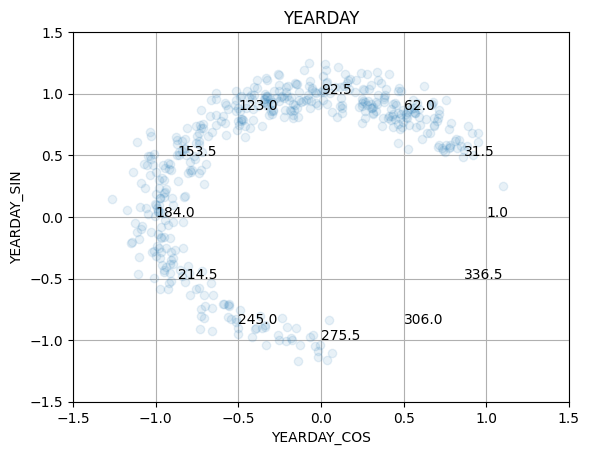

In [11]:
plt.clf()
plt.title("YEARDAY")
plt.xlabel("YEARDAY_COS")
plt.ylabel("YEARDAY_SIN")

# plt.rcParams["figure.figsize"] = (6, 6)

plt.grid(True)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
e1 = 0.1*np.random.normal(size=dx.shape[0])
e2 = 0.1*np.random.normal(size=dx.shape[0])
plt.plot(dx["YEARDAY_COS"]+e1, dx["YEARDAY_SIN"]+e2, "o", alpha=0.1)
for i in range(12):
    x = np.cos(2*np.pi*i*30.5/366)
    y = np.sin(2*np.pi*i*30.5/366)
    plt.text(x, y, str(30.5*i+1))
plt.show()

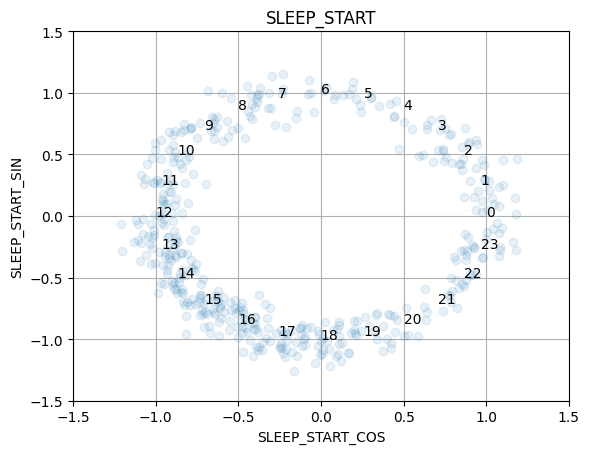

In [12]:
plt.clf()
plt.title("SLEEP_START")
plt.xlabel("SLEEP_START_COS")
plt.ylabel("SLEEP_START_SIN")
plt.grid(True)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
e1 = 0.1*np.random.normal(size=dx.shape[0])
e2 = 0.1*np.random.normal(size=dx.shape[0])
plt.plot(dx["SLEEP_START_COS"]+e1, dx["SLEEP_START_SIN"]+e2, "o", alpha=0.1)
for i in range(24):
    x = np.cos(2*np.pi*i/24)
    y = np.sin(2*np.pi*i/24)
    plt.text(x, y, str(i))
plt.show()

Standardize the sleep variables.

In [13]:
exclude = ["STUDY_PRTCPT_ID", "STUDYDAY", "YEARDAY_SIN", "YEARDAY_COS", "YEARDAY", "DAYOFWEEK"]
va = [x for x in dx.columns if x not in exclude]
dx[va] = dx[va] - dx[va].mean(0)
dx[va] = dx[va] / dx[va].std(0)
dx["STUDY_PRTCPT_ID"].value_counts()

STUDY_PRTCPT_ID
XKZF8SDS    85
15LGWNGJ    82
W7LX2I74    36
T4CSRKVM    32
8MRVHIRR    31
RYFXBDFQ    28
N5F15GYZ    26
MLYS5U85    24
KL8ZU5XC    19
3IJBZPI8    12
F1MALNM8    11
SBTLFFUR    10
CCD84K8N    10
IS69SBYZ     8
RQ5P4ZR8     8
JU3R5P4M     7
XGJ8AFS8     6
UQUEK1XU     6
VZK8IVKE     5
VL61MMTY     5
Y8PEMP7K     4
Name: count, dtype: int64

<Axes: >

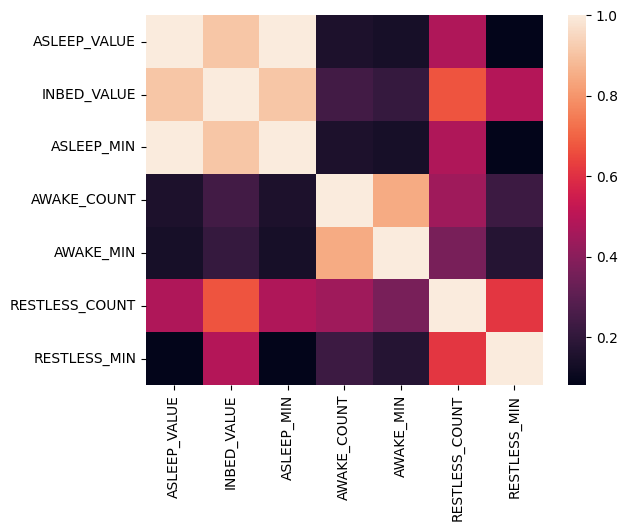

In [14]:
# Checking the heat map without rearranging according to the eigen values 
v = [x for x in va if not (x.endswith("_SIN") or x.endswith("_COS"))]
# print("v is %s" %v)
X = dx[v].copy()
X0 = X - X.mean(0)

sns.heatmap(X0.corr())

v is ['ASLEEP_VALUE', 'INBED_VALUE', 'ASLEEP_MIN', 'AWAKE_COUNT', 'AWAKE_MIN', 'RESTLESS_COUNT', 'RESTLESS_MIN']
a is [-9.24946101e-17  1.34589900e-03  1.43770253e-01  2.87667781e-01
  1.11425092e+00  1.78425621e+00  3.66870893e+00]
sorted values of eigenvalues for correlation matrix C is 
 [0 1 2 3 4 5 6]
jj is [1 0 2 5 3 6 4]


<Axes: >

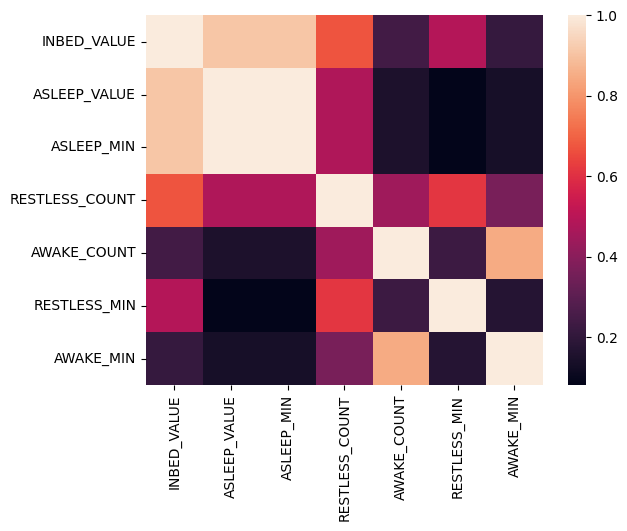

In [15]:
v = [x for x in va if not (x.endswith("_SIN") or x.endswith("_COS"))]
print("v is %s" %v)
X = dx[v].copy()
X0 = X - X.mean(0)
C = X0.corr()
a, b = eigh(C)
print("a is %s" %a)
# print ("b is %s" %b)
# print("C is %s" %C)
print("sorted values of eigenvalues for correlation matrix C is \n %s" %np.argsort(a))
ii = np.argmax(a)
# print("ii is %s" %ii)
jj = np.argsort(b[:, ii])
print ("jj is %s" %jj)
X0 = X0.iloc[:, jj]
sns.heatmap(X0.corr())

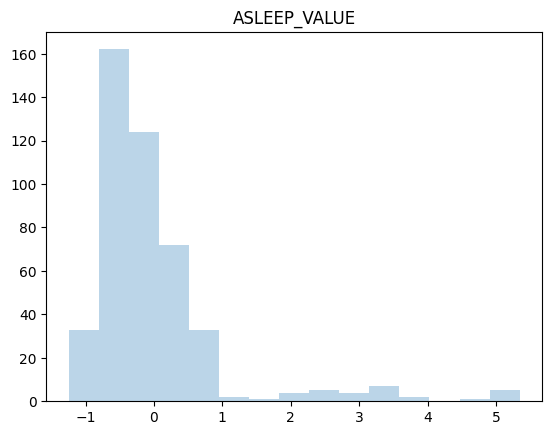

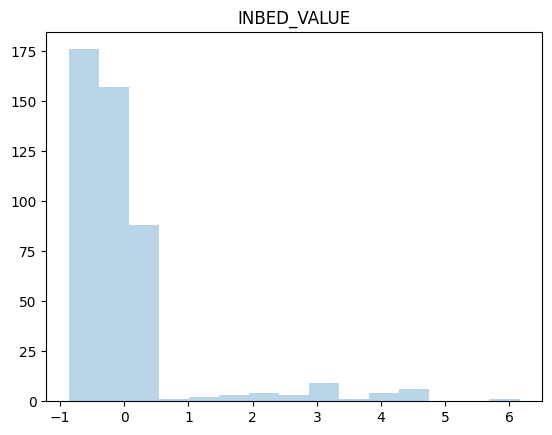

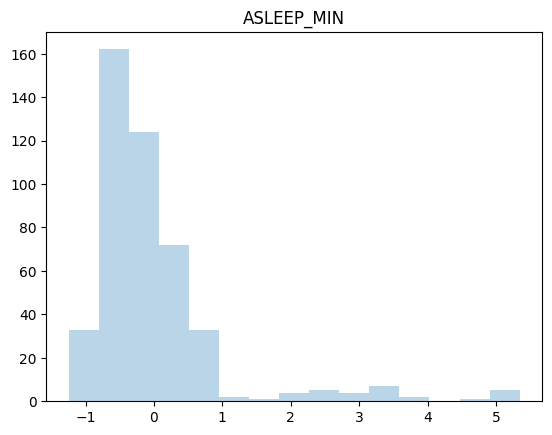

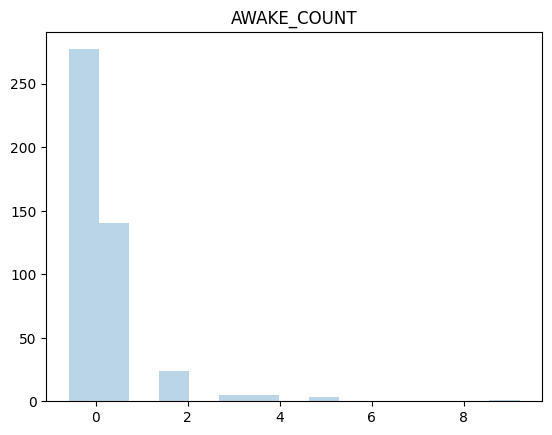

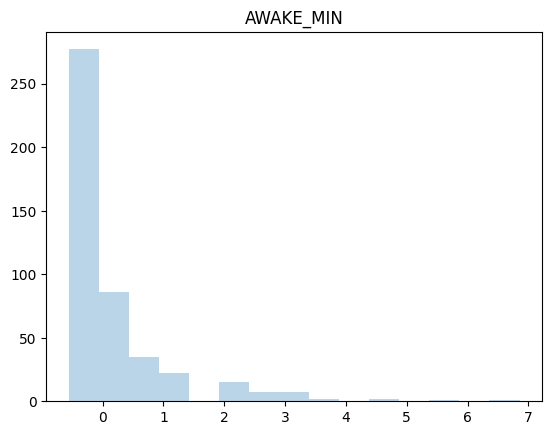

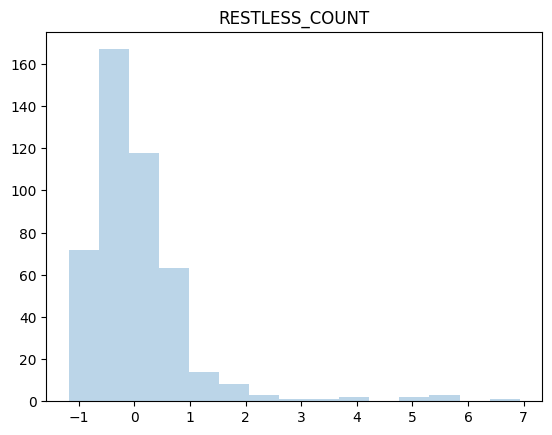

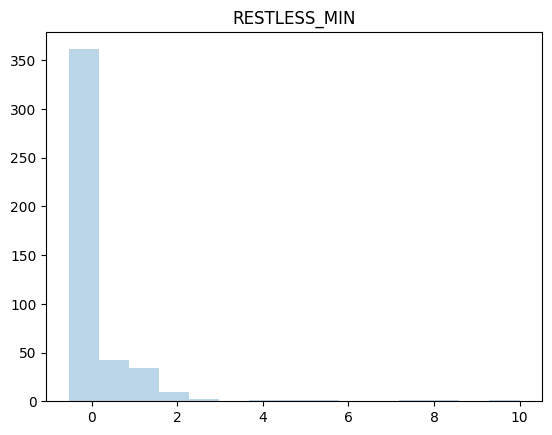

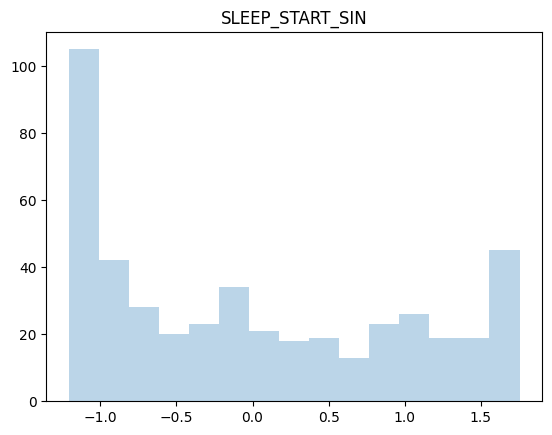

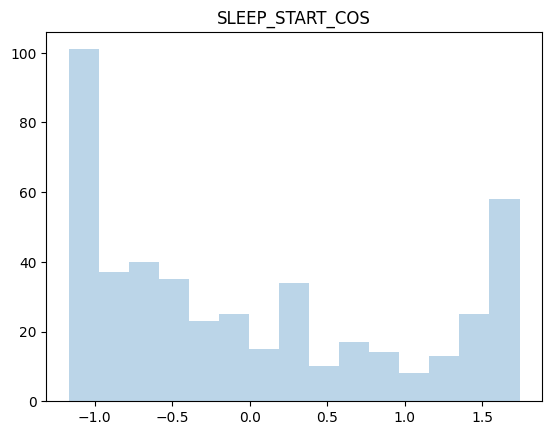

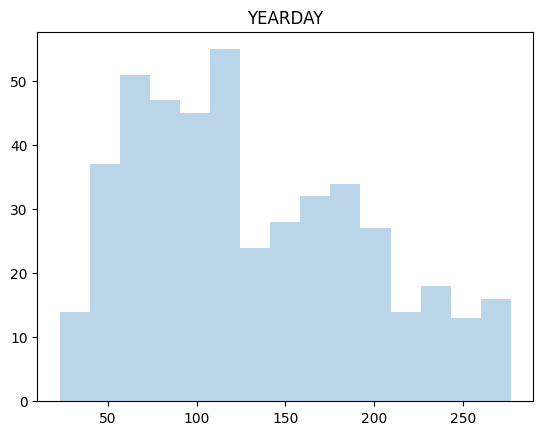

In [16]:
for v in va + ["YEARDAY"]:
    plt.hist(dx[v], bins=15, alpha=0.3)
    plt.title(v)
    plt.show()

# PCA/biplots

In [17]:
def plot_eigs(eigs): # Plot all the logarithms of all the eigenvalues greater than 1e-10 in 
    jj = np.arange(1, len(eigs) + 1)
    ii = np.flatnonzero(eigs >= 1e-10) # np.flatnonzero returns indices of the non-zero elements 
    plt.clf()
    plt.grid(True)
    plt.plot(np.log(jj[ii]), np.log(eigs[ii]), "-o")
    plt.ylabel("Log eigenvalue", size=15)
    plt.xlabel("Log position", size=15)
    plt.show()

In [18]:
def varimax(X, eps=1e-05, maxiter=1000):
    G = X.copy()
    m, p = G.shape
    Q = np.eye(p)
    if p < 2: 
        return G, Q
    d = 0.0
    for i in range(maxiter):
        z = np.dot(G, Q)
        cs = (z**2).sum(0)
        B = np.dot(G.T, z**3 - z * (cs / m))
        u, s, vt = np.linalg.svd(B, 0)
        Q = np.dot(u, vt)
        dlast = d
        d = s.sum()
        if d < dlast * (1 + eps): 
            break
            
    G = np.dot(G, Q)
    return G, Q

In [19]:
def ellipse_plot(U, idx, j0, j1):
    r2 = chi2(2).ppf(0.95)
    rr = np.sqrt(r2)
    dx = pd.DataFrame({"u0": U[:, 0], "u1": U[:, 1], "id": idx})
    plt.clf()
    plt.figure(figsize=(10, 10))
    plt.grid(True)
    plt.plot(dx["u0"], dx["u1"], "o", color="black", alpha=0.05)
    for (ky,dg) in dx.groupby("id"):
        if dg.shape[0] > 10:
            m0, m1 = dg["u0"].mean(), dg["u1"].mean()
            C = np.cov(dg["u0"], dg["u1"])
            a, b = eigh(C)
            plt.plot([m0], [m1], "o", color="blue", ms=8, alpha=0.2)
            ang = np.arctan2(b[1, 1], b[0, 1])*360/(2*np.pi)
            E = Ellipse(xy=[m0,m1], width=rr*np.sqrt(a[1]), height=rr*np.sqrt(a[0]), fc="none", ec="black", angle=ang)
            plt.gca().add_artist(E)
    plt.xlabel("Component %d" % j0, size=17)
    plt.ylabel("Component %d" % j1, size=17)
    plt.show()

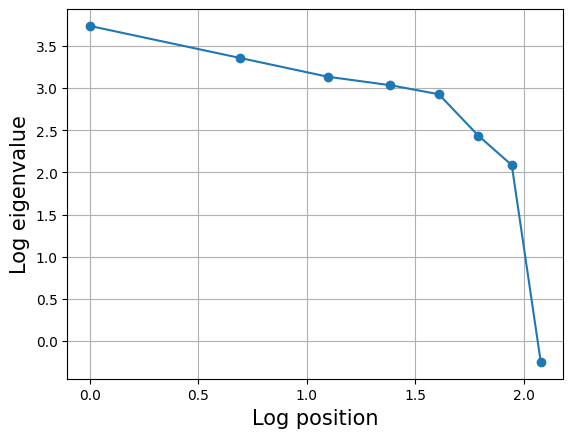

<Figure size 640x480 with 0 Axes>

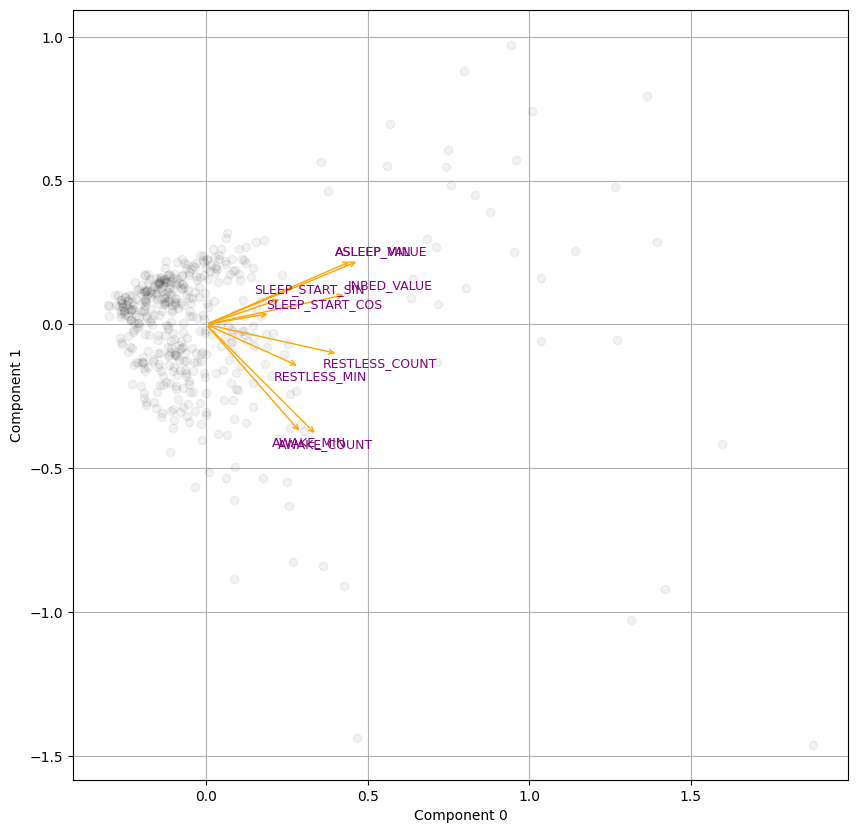

<Figure size 640x480 with 0 Axes>

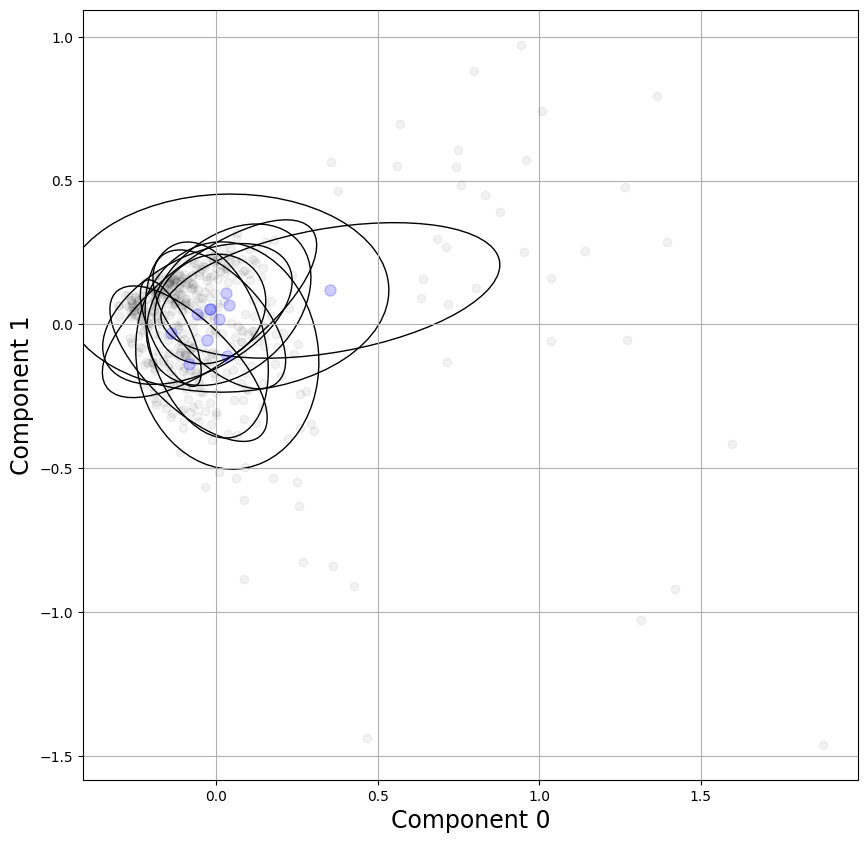

<Figure size 640x480 with 0 Axes>

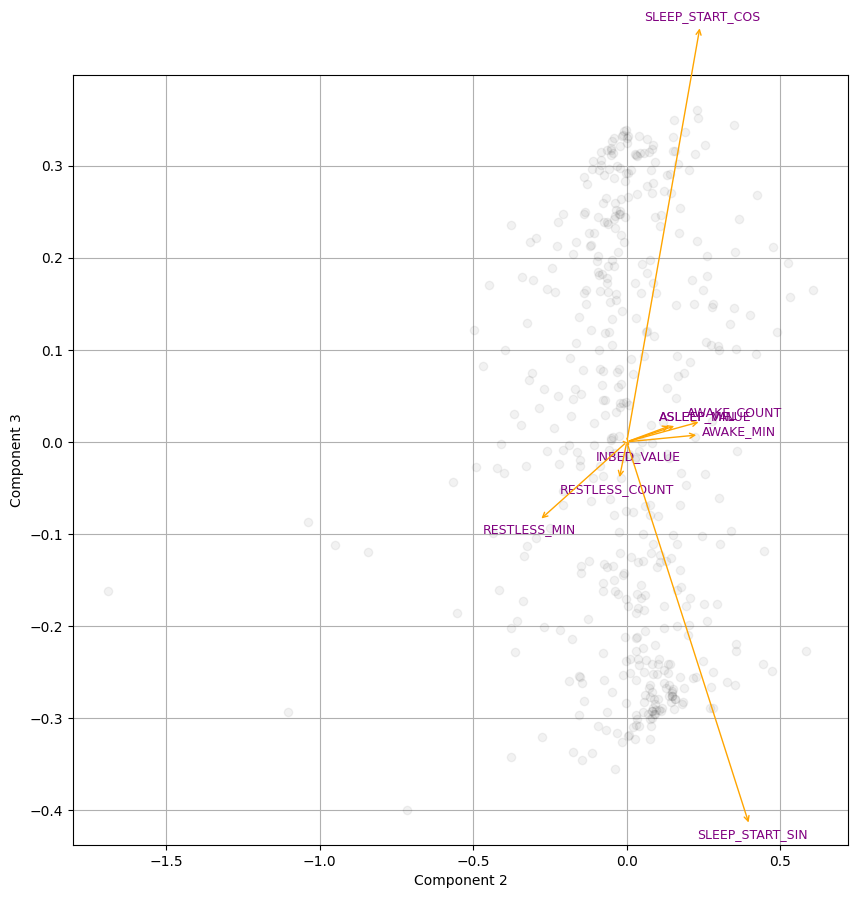

<Figure size 640x480 with 0 Axes>

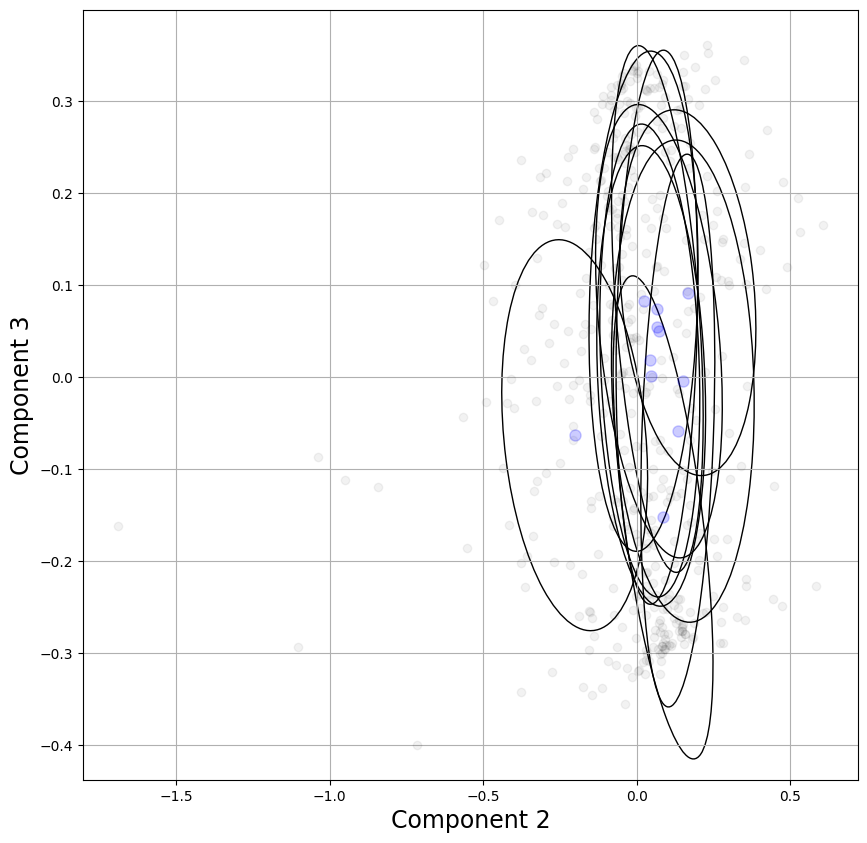

<Figure size 640x480 with 0 Axes>

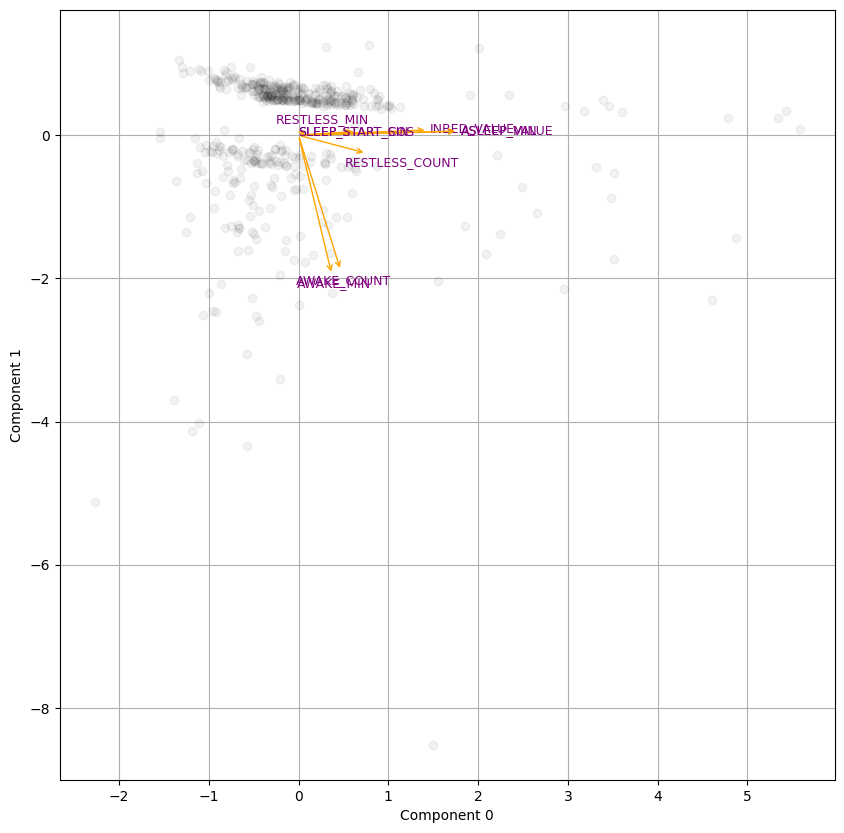

<Figure size 640x480 with 0 Axes>

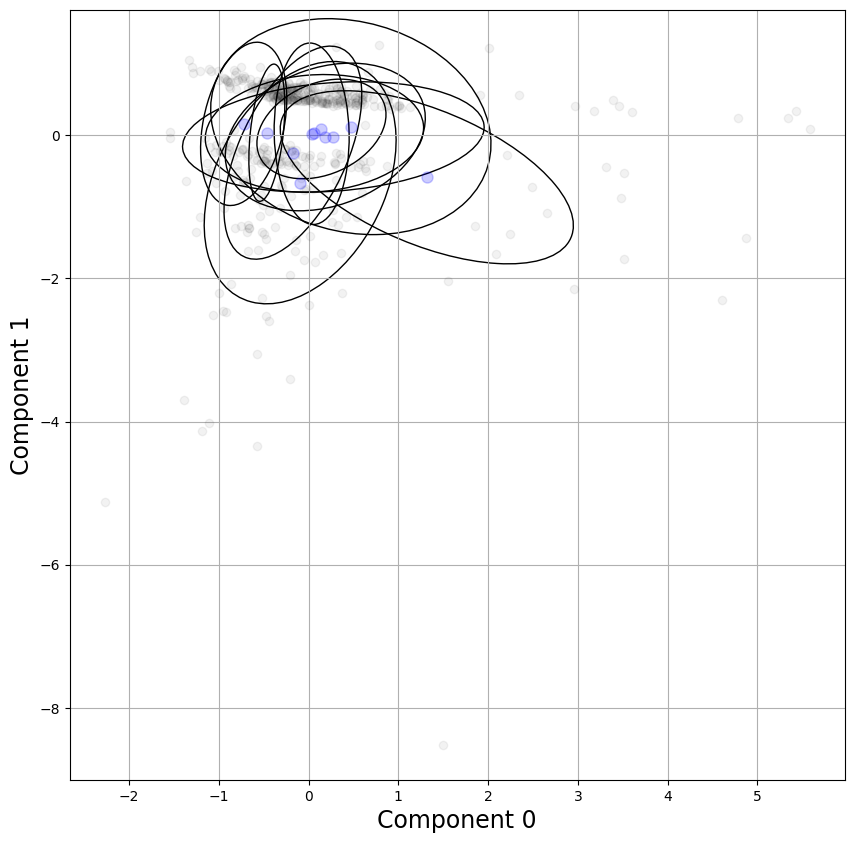

<Figure size 640x480 with 0 Axes>

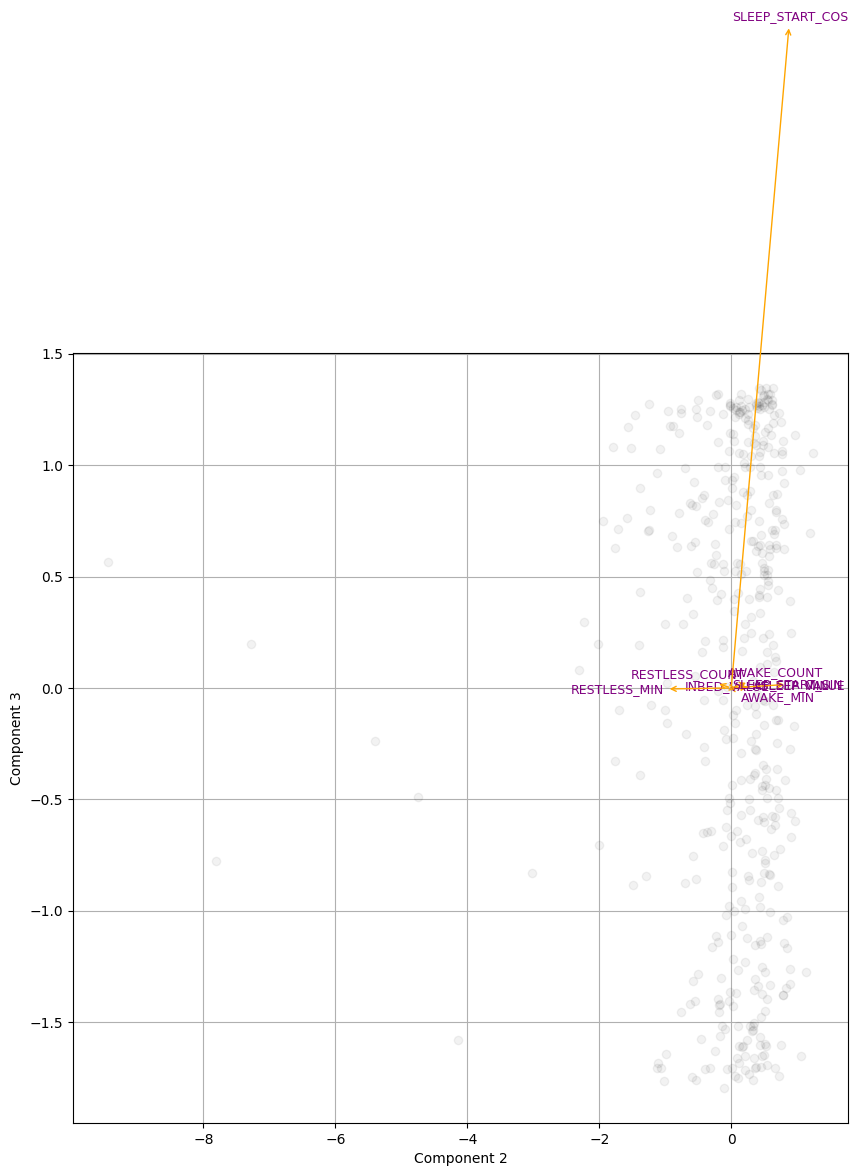

<Figure size 640x480 with 0 Axes>

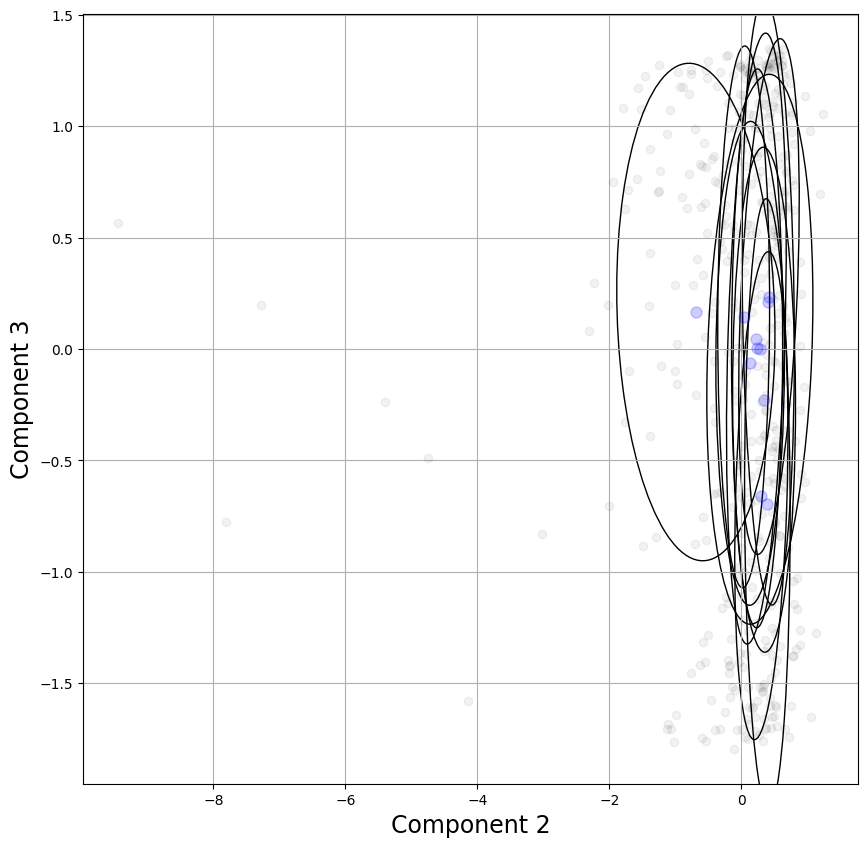

In [20]:
def biplot(dx, va, j=0, k=1, d=5, rotate=False, scree=False, ellipses=False):
    assert d > max(j, k)
    dx = dx.copy()
    X = np.asarray(dx[va])
    n, p = X.shape
    X -= X.mean()
    X -= X.mean(0)
    u, s, vt = np.linalg.svd(X, 0)
    v = vt.T
    if scree:
        plot_eigs(s)
    uu = u[:, 0:d]
    vv = v[:, 0:d]
    ss = s[0:d]
    if rotate:
        uu, Ru = varimax(uu)
        uu *= np.sqrt(n)
        vv, Rv = varimax(vv)
        vv *= np.sqrt(p)
        B = np.dot(Ru.T * ss, Rv) / np.sqrt(n*p)
    else:
        uu *= (ss**0.5)
        vv *= (ss**0.5)
        B = np.eye(d)
        
    ff = np.sqrt(X.shape[0] / X.shape[1]) # May need to adjust this
    v /= ff
    plt.clf()
    plt.figure(figsize=(10, 10))
    plt.grid(True)
    plt.plot(uu[:, j], uu[:, k], "o", color="black", alpha=0.05)
    for i in range(v.shape[0]):
        plt.annotate(va[i], xy=(0, 0), xytext=(vv[i, j], vv[i, k]), 
                     arrowprops=dict(color='orange', arrowstyle="<-"), color="purple", size=9)
    plt.xlabel("Component %d" % j)
    plt.ylabel("Component %d" % k)
    plt.show()
    
    if ellipses:
        ellipse_plot(uu[:, [j, k]], dx["STUDY_PRTCPT_ID"], j,k)
        
biplot(dx, va, 0, 1, d=5, rotate=False, scree=True, ellipses=True)
biplot(dx, va, 2, 3, d=5, rotate=False, ellipses=True)
biplot(dx, va, 0, 1, d=5, rotate=True, ellipses=True)
biplot(dx, va, 2, 3, d=5, rotate=True, ellipses=True)

# MANOVA
Use multivariate analysis of variance (MANOVA) to understand the between-subject and within-subject differences.

In [21]:
def manova1(dx, va, grp):
    """
    Run MANOVA on the data in dx[va], which have been centered.  The groups are
    defined by the column dx[grp].
    
    Returns:
    - H : Scaled estimate of Cov E[X|g]
    - E : Scaled estimate of E Cov[X|g]
    - ee : eigenvalues of E^-1 H
    - B : eigenvectors of E^-1 H
    - (pillai, trace, lawley, roy) : fit statistics
    """
    dg = dx.groupby(grp)[va]
    X = dx[va].values
    w = dg.size()
    M = dg.mean()
    assert all(w.index == M.index)
    w = w.values
    M = M.values
    Mw = np.sqrt(w)[:, None] * M
    H = np.dot(Mw.T, Mw)
    E = np.dot(X.T, X) - H
    ee, B = eigh(H, E)
    if ee.min() < 0:
        raise ValueError("Negative eigenvalue in MANOVA")
    ii = np.argsort(-ee)
    ee = ee[ii]
    B = B[:, ii]
    pillai = np.sum(ee / (1 + ee))
    lawley = np.sum(ee)
    wilks = np.prod(1 / (1 + ee))
    roy = ee[0] / (1 + ee[0])
    return H, E, ee, B, (pillai, lawley, wilks, roy)

In [22]:
def manova(dx, va, grp, nrep=1000, center=True):
    """
    Run MANOVA on the data in X, using randomization to calibrate the statistics.
    
    Returns:
    - H : Scaled estimate of Cov E[X|g]
    - E : Scaled estimate of E Cov[X|g]
    - ee : eigenvalues of E^-1 H
    - B : eigenvectors of E^-1 H
    - (pillai, trace, lawley, roy) : fit statistics
    - stats0 : each row is a randomized realization of the fit statistics
    """
    dx = dx.copy()
    if center:
        dx[va] = dx[va] - dx[va].mean(0)
    X = dx[va].values
    a, _ = np.linalg.eigh(np.cov(X.T))
    if a.min() <= 1e-8:
        raise ValueError("The marginal covariance matrix is singular")
    n = dx.shape[0]
    H, E, ee, B, stats = manova1(dx, va, grp)
    stats0 = np.empty((nrep, 4))
    for i in range(nrep):
        dx[grp] = dx[grp].sample(frac=1).values
        _, _, _, _, s = manova1(dx, va, grp)
        stats0[i, :] = s
        
    return X, H, E, ee, B, stats, stats0

Transform the MANOVA summary statistics to make them more interpretable.

In [23]:
def xstat_manova(stats, stats0, p):
    stats = np.copy(stats)
    stats0 = np.copy(stats0)
    # Pillai becomes the mean PVE
    stats[0] /= p
    stats0[:, 0] /= p
    # Lawley becomes the mean SNR
    stats[1] /= p
    stats0[:, 1] /= p
    # Wilks becomes the geometric mean of 1 - PVE
    stats[2] = np.power(stats[2], 1/p)
    stats0[:, 2] = np.power(stats0[:, 2], 1/p)
    # Not sure what to do with this...
    stats[3] = np.power(stats[3], 1/p)
    stats0[:, 3] = np.power(stats0[:, 3], 1/p)
    return stats, stats0

Run the MANOVA to assess inter-subject differences.  ASLEEP_VALUE is redundant so drop it here.

In [24]:
va1 = [x for x in va if x != "ASLEEP_VALUE"]
X0, H, E, ee, B, stats, stats0 = manova(dx, va1, "STUDY_PRTCPT_ID")
statsx, stats0x = xstat_manova(stats, stats0, len(va))

Plot the summary statistics.

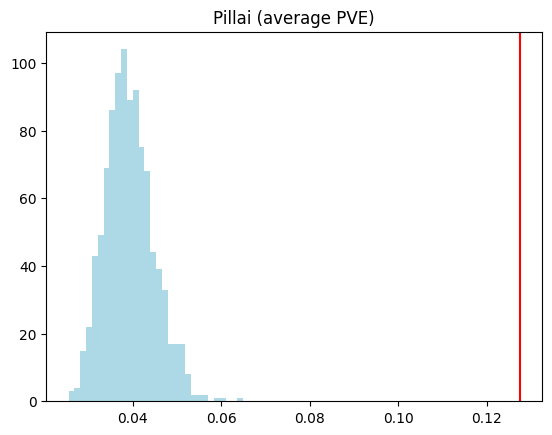

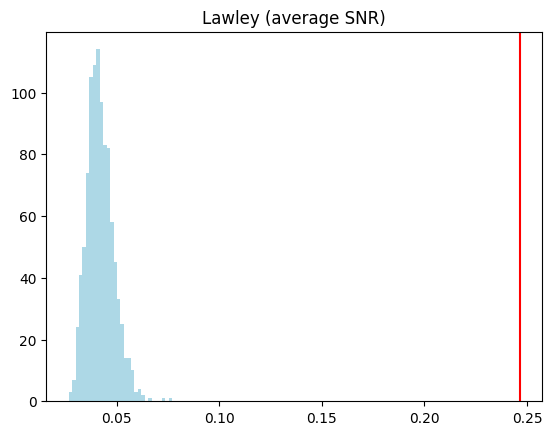

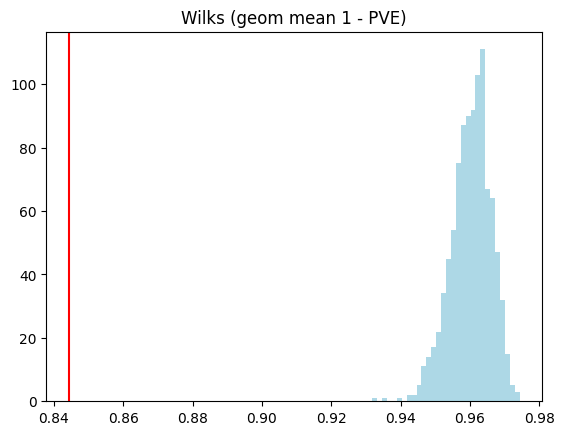

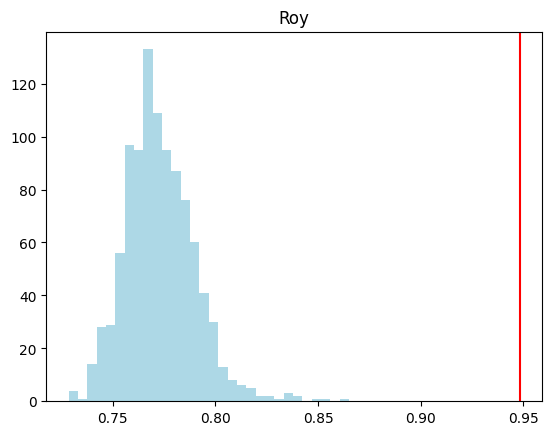

In [25]:
for (k, ti) in enumerate(["Pillai (average PVE)", "Lawley (average SNR)", "Wilks (geom mean 1 - PVE)", "Roy"]):
    plt.hist(stats0x[:, k], bins=30, color="lightblue")
    plt.axvline(statsx[k], color="red")
    plt.title(ti)
    plt.show()

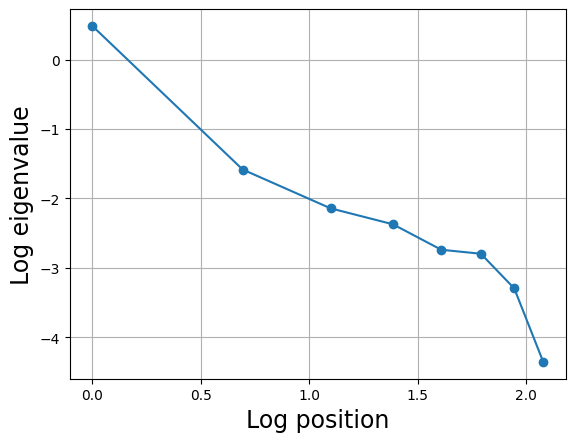

<Figure size 640x480 with 0 Axes>

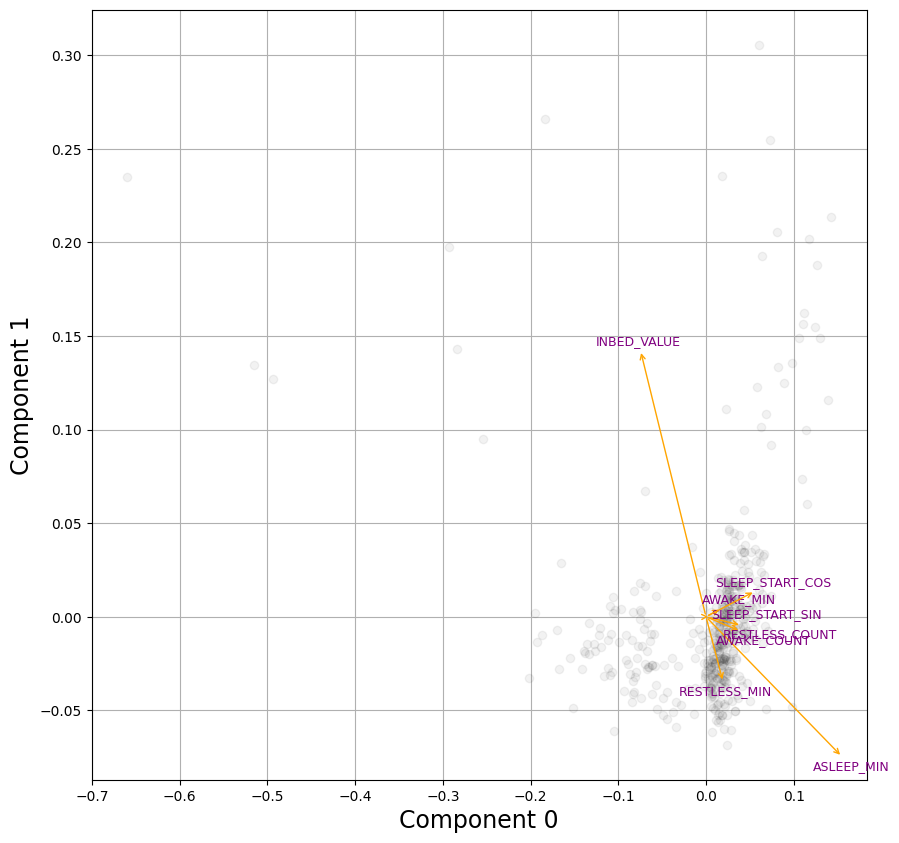

<Figure size 640x480 with 0 Axes>

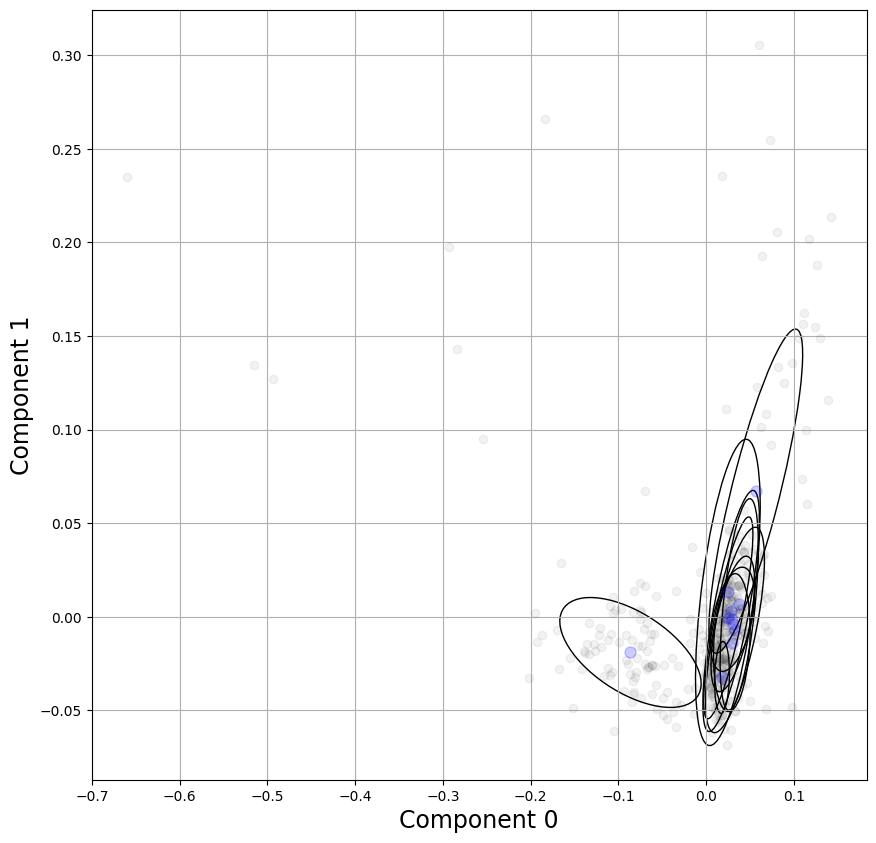

<Figure size 640x480 with 0 Axes>

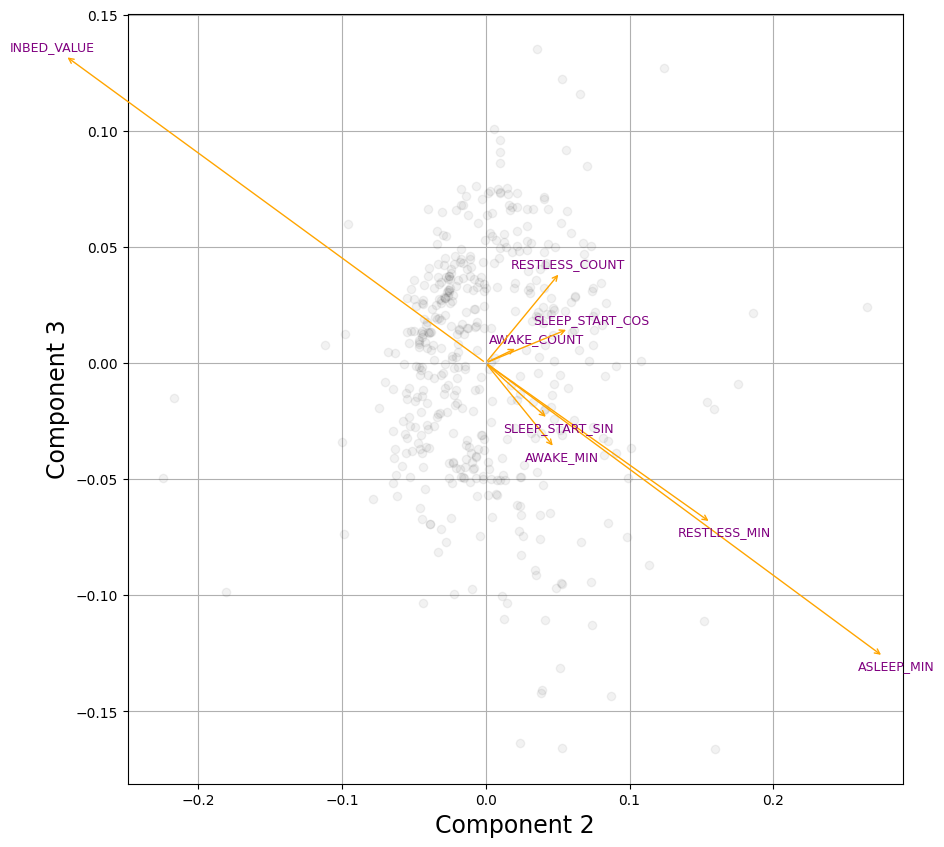

<Figure size 640x480 with 0 Axes>

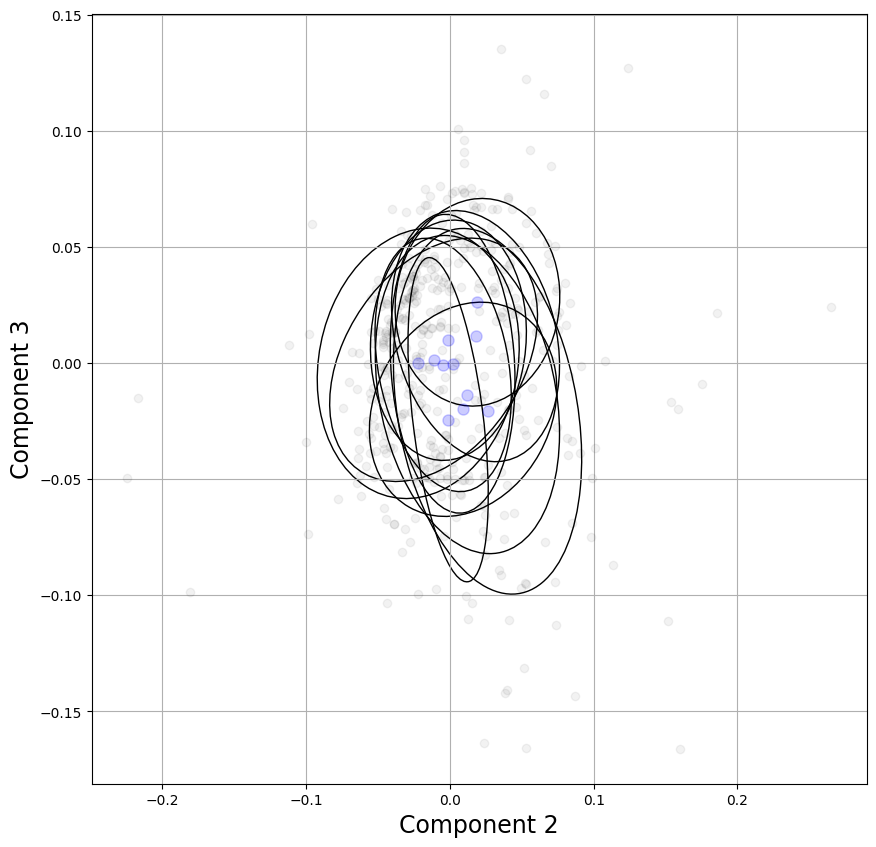

<Figure size 640x480 with 0 Axes>

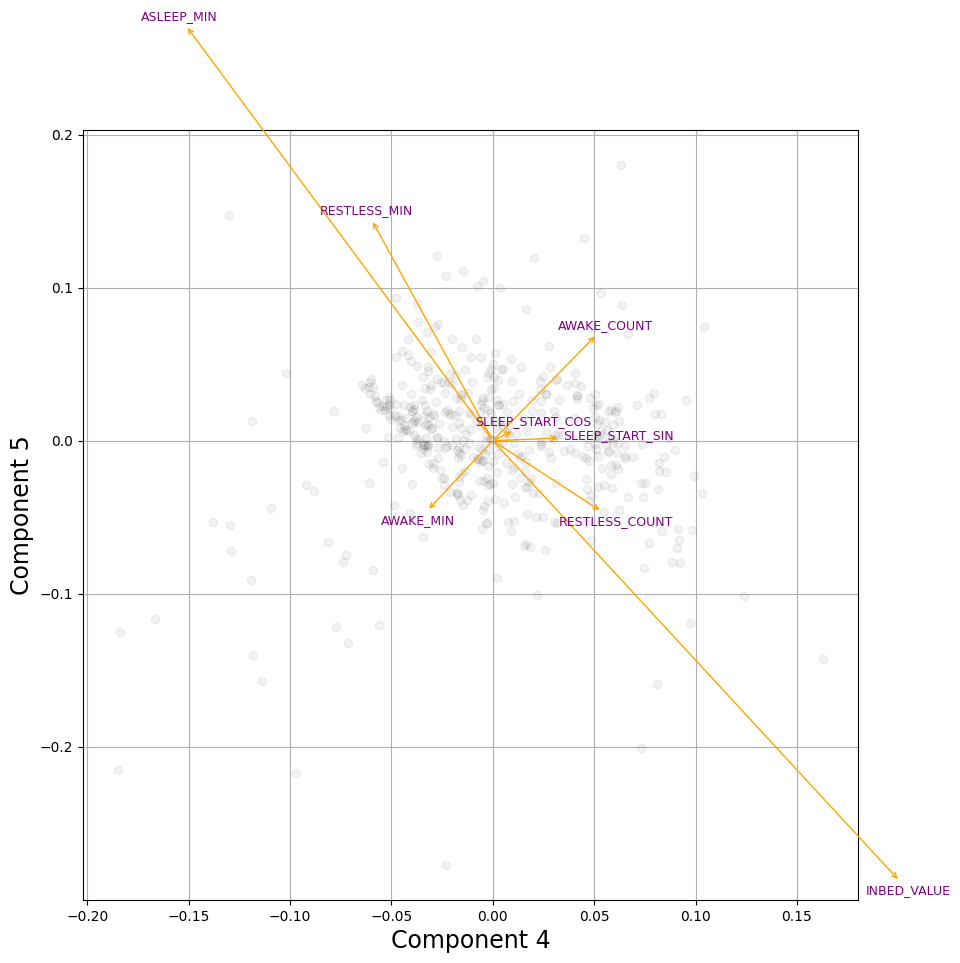

<Figure size 640x480 with 0 Axes>

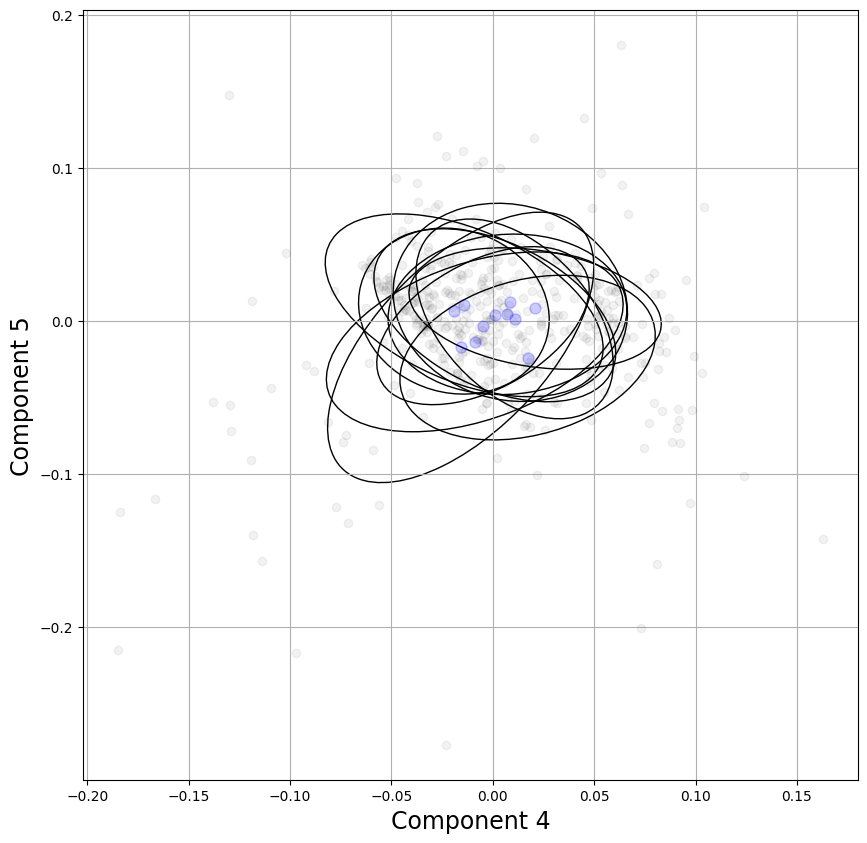

In [26]:
def biplot(j0, j1, X0, B, ee, va, scree=False, ellipses=True):
    scores = np.dot(X0, B[:, [j0, j1]])
    if scree:
        plt.clf()
        plt.grid(True)
        jj = np.arange(1, len(ee)+1)
        plt.plot(np.log(jj), np.log(ee), "-o")
        plt.xlabel("Log position", size=17)
        plt.ylabel("Log eigenvalue", size=17)
        plt.show()
    plt.clf()
    plt.figure(figsize=(10,10))
    plt.grid(True)
    plt.plot(scores[:, 0], scores[:, 1], "o", color="black", alpha=0.05)
    for i in range(B.shape[0]):
        plt.annotate(va[i], xy=(0, 0), xytext=(B[i, j0], B[i, j1]), 
                     arrowprops=dict(color='orange', arrowstyle="<-"), color="purple", size=9)
    plt.xlabel("Component %d" % j0, size=17)
    plt.ylabel("Component %d" % j1, size=17)
    plt.show()

    if ellipses:
        ellipse_plot(scores, dx["STUDY_PRTCPT_ID"], j0, j1)
    
biplot(0, 1, X0, B, ee, va1, scree=True, ellipses=True)
biplot(2, 3, X0, B, ee, va1, ellipses=True)
biplot(4, 5, X0, B, ee, va1, ellipses=True)

# Dimension reduction regression

Use sliced inverse regression to understand the possible roles of day of week, and seasonality

In [27]:
def sir(dx, xv, yv):
    dx = dx.copy()
    dx[xv] = dx[xv] - dx[xv].mean(0)
    C = dx[xv].cov()
    a,_ = eigh(C)
    if a.min() < 1e-10:
        raise ValueError("Marginal covariance of predictors is singular")
    mn, wt = [], []
    for (ky,dg) in dx.groupby(yv):
        mn.append(dg[xv].mean(0))
        wt.append(dg.shape[0])
    M = np.stack(mn)
    wt = np.asarray(wt)
    wt = wt / wt.sum()
    Mw = np.sqrt(wt)[:, None] * M
    H = np.dot(Mw.T, Mw)    
    a, b = eigh(H, C)
    ii = np.argsort(-a)
    a = a[ii]
    b = b[:, ii]
    b = pd.DataFrame(b, columns=["B%d" % j for j in range(len(xv))], index=xv)
    return b, a

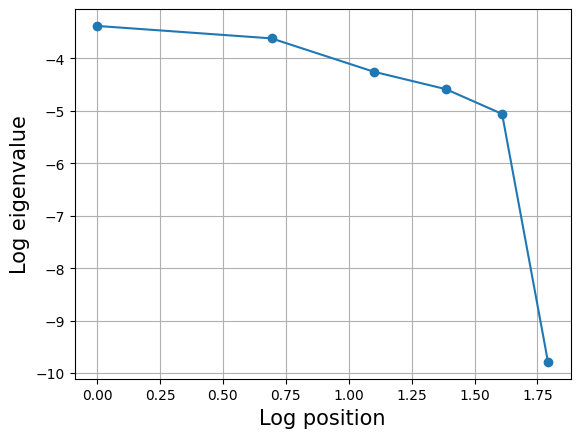

,B0,B1,B2,B3
ASLEEP_MIN,0.499107,-0.077877,0.978704,0.456397
AWAKE_COUNT,-0.871044,-0.464493,0.286389,0.180465
AWAKE_MIN,0.995009,0.908729,-0.055479,0.004905
RESTLESS_COUNT,-0.723307,0.123737,-0.355598,0.080880
RESTLESS_MIN,-0.012838,0.612913,0.169108,-0.080288
SLEEP_START_SIN,-0.523540,-0.392464,-0.067723,0.194393
SLEEP_START_COS,-0.139352,-0.089894,0.272736,-0.980420


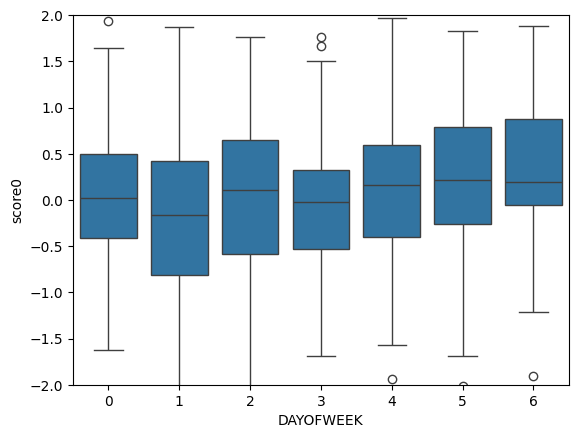

In [28]:
va2 = [x for x in va1 if x != "INBED_VALUE"]

dirs, eigs = sir(dx, va2, "DAYOFWEEK")
plot_eigs(eigs)

dirs.iloc[:, 0:4]
scores = np.dot(dx[va2], dirs.iloc[:, 0:3])

dp = pd.DataFrame({"DAYOFWEEK": dx["DAYOFWEEK"], "score0": scores[:, 0]})
sns.boxplot(dp, x="DAYOFWEEK", y="score0")
plt.ylim(-2, 2)
dirs.iloc[:, 0:4]

In [29]:
np.shape(scores)

(455, 3)

# UMAP

This is a very popular modern method but I'm not sure whether it will be useful for us.  It is worth a try.

In [30]:
import umap
import umap.umap_ as umap

um = umap.UMAP(random_state=123)
emb = um.fit_transform(dx[va1])
emb -= emb.mean(0)
emb /= emb.std(0)

C:\Users\rajnishk\AppData\Local\anaconda3\envs\SWG_sleep_analysis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\rajnishk\AppData\Local\anaconda3\envs\SWG_sleep_analysis\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Color the points by person

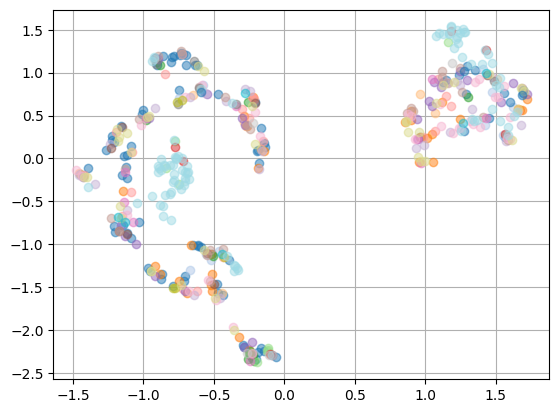

In [31]:
tab20 = matplotlib.colormaps["tab20"].colors
plt.clf()
plt.grid(True)
dp = pd.DataFrame({"id": dx["STUDY_PRTCPT_ID"], "emb0": emb[:, 0], "emb1": emb[:, 1]})
for j,(ky,dg) in enumerate(dp.groupby("id")):
    plt.plot(dg["emb0"], dg["emb1"], "o", alpha=0.5, color=tab20[j % 20])

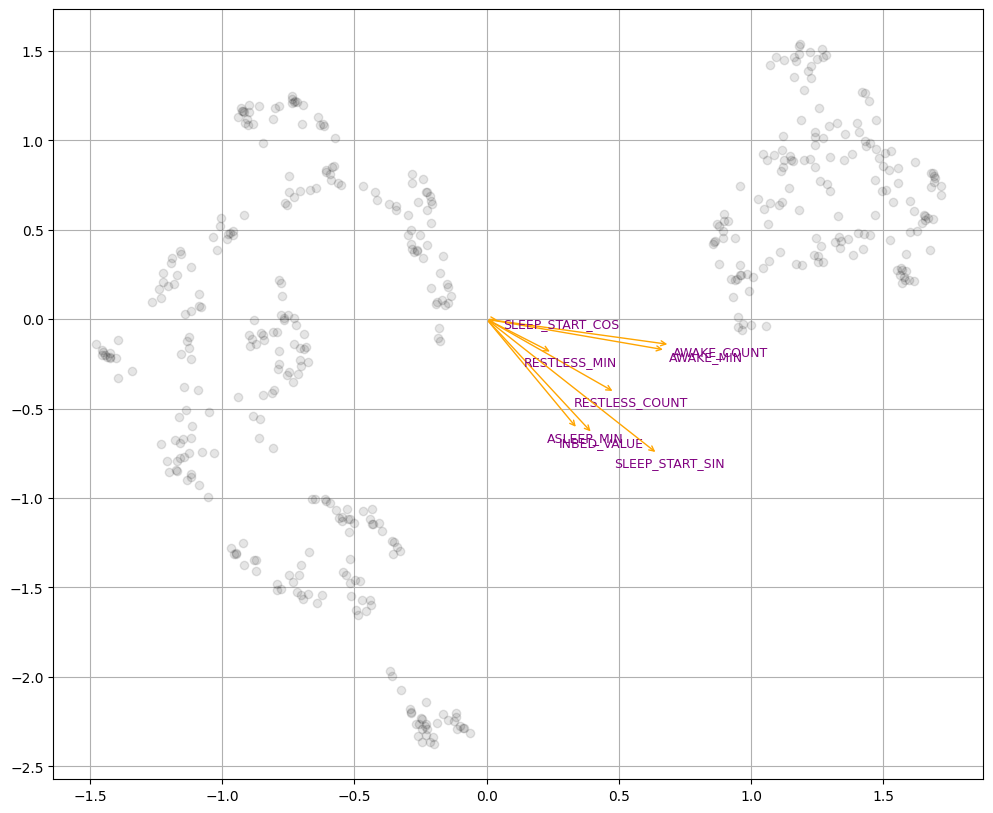

In [32]:
plt.clf
plt.figure(figsize=(12, 10))
plt.grid(True)
plt.plot(emb[:, 0], emb[:, 1], "o", color="black", alpha=0.1)
for v in va1:
    cc = np.linalg.lstsq(emb, dx[v], rcond=None)[0]
    plt.annotate(v, xy=(0, 0), xytext=cc, 
                 arrowprops=dict(color='orange', arrowstyle="<-"), color="purple", size=9)
plt.show()

<Figure size 640x480 with 0 Axes>

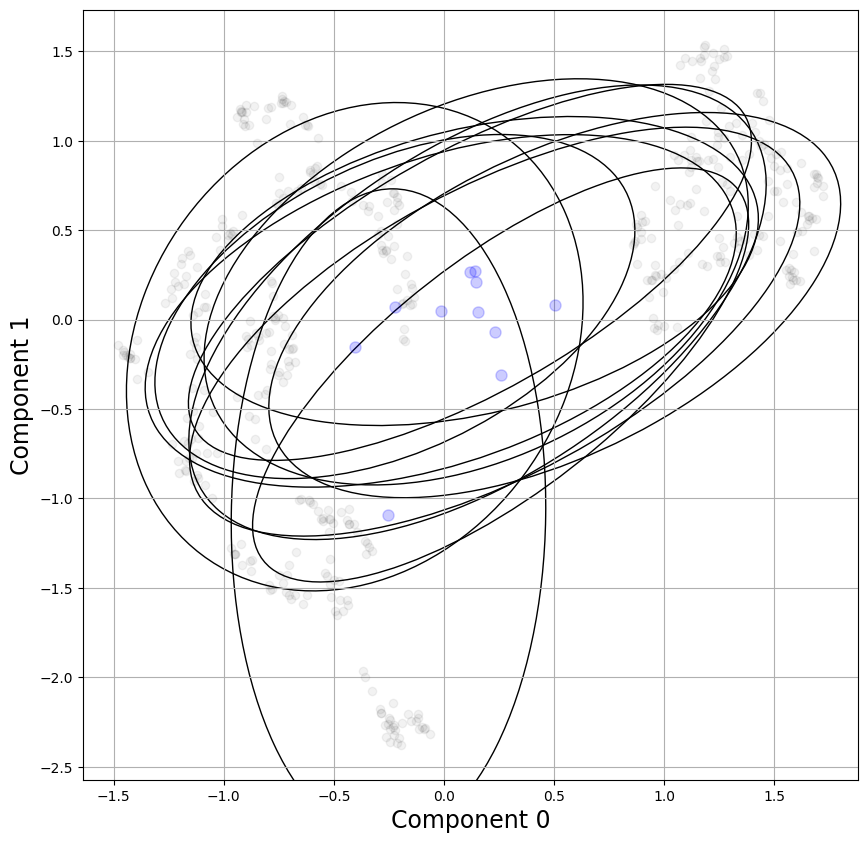

In [33]:
ellipse_plot(emb, dx["STUDY_PRTCPT_ID"], 0, 1)

# CORE

Covariance reduction to identify heteroscedasticity.

In [34]:
tab20 = matplotlib.colormaps["tab20"].colors

In [35]:
nobs = dx["STUDY_PRTCPT_ID"].value_counts()
nobs = pd.DataFrame({"STUDY_PRTCPT_ID": nobs.index, "nobs": nobs.values})
dy = pd.merge(dx, nobs, left_on="STUDY_PRTCPT_ID", right_on="STUDY_PRTCPT_ID")
dy = dy.loc[dy.nobs > 10, :]
idx = np.asarray(dy["STUDY_PRTCPT_ID"].astype(str))
X = np.asarray(dy[va2])
m = CORE(idx, X, 2)
r = m.fit(maxiter=1000)
qq = pd.DataFrame(r.params, va2, columns=["B%d" % j for j in range(2)])
qq

,B0,B1
ASLEEP_MIN,-0.990279,0.015791
AWAKE_COUNT,-0.070729,-0.241745
AWAKE_MIN,0.100835,0.215995
RESTLESS_COUNT,0.045586,-0.782943
RESTLESS_MIN,0.025383,0.529689
SLEEP_START_SIN,0.017916,-0.030022
SLEEP_START_COS,0.033675,-0.013578


<Figure size 640x480 with 0 Axes>

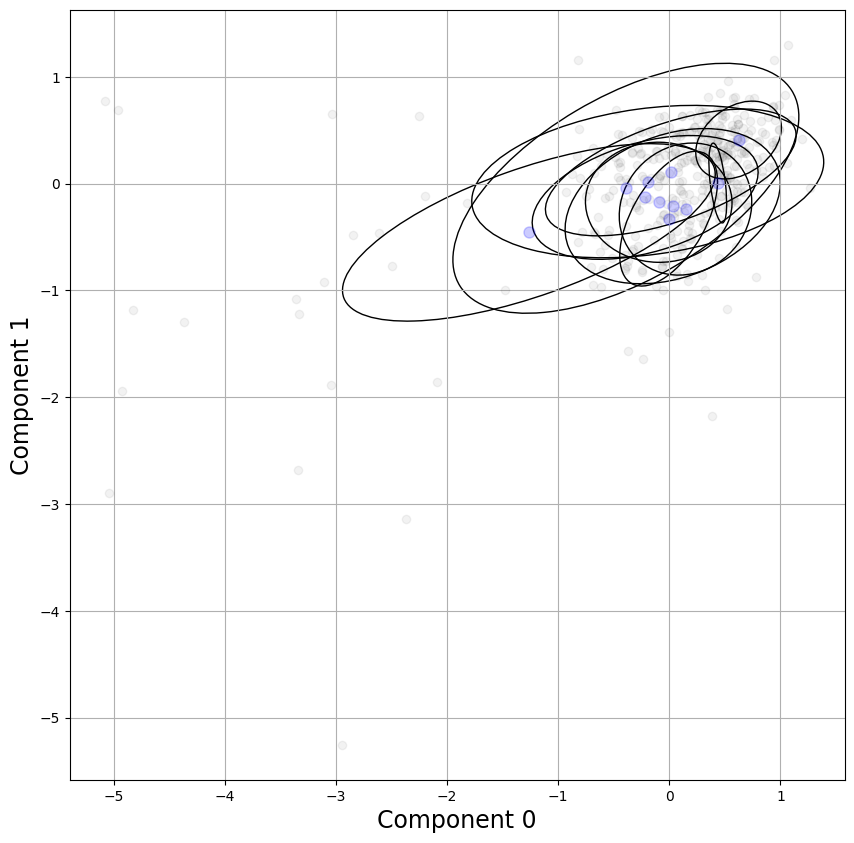

In [36]:
ellipse_plot(np.dot(X, r.params), dy["STUDY_PRTCPT_ID"], 0, 1)